In [11]:
# Tugas Pengganti Presensi Pertemuan 13
# Laurentius Nathaniel (Python G8) ( 1101194377 )

import numpy as np
import matplotlib.pyplot as plt

In [12]:
'''
fr = Frekuensi (MHz)
Tipe_Area = Tipe Area (urban, suburban, open)
hT = Tinggi Pemancar (meter)
hR = Tinggi User (meter)
d = Jarak (meter)
'''

def cost(fr,Tipe_Area,hT,hR,d):
    # Ca dan Cb di frekuensi tertentu
    if fr in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif fr in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    # nilai Cm sesuai dengan Tipe Area
    if Tipe_Area == 'Urban' :
        Cm = 0
    elif Tipe_Area == 'Suburban' :
        Cm = -2*((np.log10((fr/28)**2))-5.4)
    elif Tipe_Area == 'Open' :
        Cm = -4.78*(np.log10(fr))+18.33*(np.log10(fr))-40.94
    else :
        Cm = 'tipe salah'
    
    # nilai variabel a dengan input Tinggi Penerima (hR) dan Frekuensi (fr)
    a_hR = (1.1*np.log10(fr)-0.7)*hR-(1.56*np.log10(fr)-1.8)
    
    # nilai Pathloss (dB)
    Lp = Ca+(Cb*np.log10(fr))-(13.83*np.log(hT))-a_hR+((44.9-6.55*np.log10(hT))*np.log10(d))-Cm
    
    # fungsi cost mengembalikan nilai pathloss
    return Lp

In [13]:
# nilai jarak pemancar dan penerima dengan 200 user diantara 200-700 m
d = np.random.randint(200,700,200)
d = d[np.argsort(d)]

# 3 nilai frekuensi untuk dibandingkan
fr1 = 700
fr2 = 900
fr3 = 1800

# tipe area
Tipe_Area_1 = "Urban"
Tipe_Area_2 = "Suburban"
Tipe_Area_3 = "Open"

# tinggi pemancar
hT = 80 #m

# tinggi penerima
hR = 1.5 #m

# menghitung PathLoss (dB) dari 1800 MHz
PathLoss_Frek_1 = cost(fr3,Tipe_Area_1,hT,hR,d)
PathLoss_Frek_1 = PathLoss_Frek_1[np.argsort(d)]

PathLoss_Frek_2 = cost(fr3,Tipe_Area_2,hT,hR,d)
PathLoss_Frek_2 = PathLoss_Frek_2[np.argsort(d)]

PathLoss_Frek_3 = cost(fr3,Tipe_Area_3,hT,hR,d)
PathLoss_Frek_3 = PathLoss_Frek_3[np.argsort(d)]

# menghitung PathLoss (dB) dari area urban
PathLoss_Tipe_1 = cost(fr1,Tipe_Area_1,hT,hR,d)
PathLoss_Tipe_1 = PathLoss_Tipe_1[np.argsort(d)]

PathLoss_Tipe_2 = cost(fr2,Tipe_Area_1,hT,hR,d)
PathLoss_Tipe_2 = PathLoss_Tipe_2[np.argsort(d)]

PathLoss_Tipe_3 = cost(fr3,Tipe_Area_1,hT,hR,d)

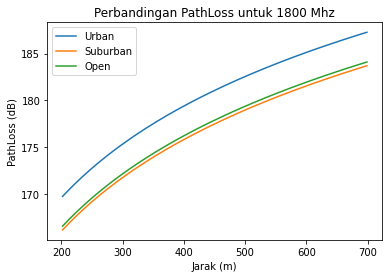

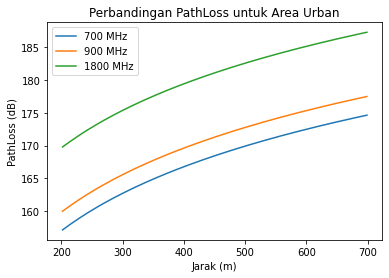

In [14]:
# grafik perbandingan Pathloss dengan frekuensi = 1800 MHz
plt.figure()
plt.plot(d, PathLoss_Frek_1, label="Urban")
plt.plot(d, PathLoss_Frek_2, label="Suburban")
plt.plot(d, PathLoss_Frek_3, label="Open")
plt.legend()
plt.title("Perbandingan PathLoss untuk 1800 Mhz")
plt.xlabel("Jarak (m)")
plt.ylabel("PathLoss (dB)")
plt.show()

# grafik perbandingan Pathloss dengan area urban
plt.figure()
plt.plot(d, PathLoss_Tipe_1, label= "700 MHz")
plt.plot(d, PathLoss_Tipe_2, label= "900 MHz")
plt.plot(d, PathLoss_Tipe_3, label= "1800 MHz")
plt.legend()
plt.title("Perbandingan PathLoss untuk Area Urban")
plt.xlabel("Jarak (m)")
plt.ylabel("PathLoss (dB)")
plt.show()